In [107]:
import pandas as pd
import matplotlib.pyplot as plt

In [108]:
arquivo = '\\Users\\Citel\\Desktop\\Ayslan\PIC\\dados_redcap_estruturados.xlsx'

planilhas = pd.read_excel(arquivo, sheet_name=None)

print(planilhas.keys())

<>:1: SyntaxWarning: invalid escape sequence '\P'
<>:1: SyntaxWarning: invalid escape sequence '\P'
C:\Users\Citel\AppData\Local\Temp\ipykernel_10408\1993130738.py:1: SyntaxWarning: invalid escape sequence '\P'
  arquivo = '\\Users\\Citel\\Desktop\\Ayslan\PIC\\dados_redcap_estruturados.xlsx'


dict_keys(['Pacientes', 'Diagnósticos', 'Diagnósticos-HPOS', 'Tratamentos', 'TratamentoConteúdos', 'Seguimento', 'Internações', 'Comorbidades', 'ABEP'])


In [109]:
df_pacientes = planilhas['Pacientes']
df_pacientes.head()


,patient_global_id,patient_unique_id,project,data_preench_identificacao,health_center,idade,peso_nascimento,raca_cor,genero,genero_outro,...,tcle_resp_legal,tcle_testemunha,tale_assinado,tale_tipo_assentimento,tale_n_assinado_motivo_esp,outro_motivo_tale,participante_recebe_auxilio,familiar_recebe_auxilio,associacao,associacao_faz_parte
0,47927869,7808,coleta_prospectiva_2022,2022-06-09,escola_bahiana_de,54.0,NaN,preta,feminino,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,64269877,18159,coleta_prospectiva_2022,2022-02-24,hospital_universitf,9.0,3600.0,parda,masculino,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,92017042,6901,coleta_prospectiva_2022,2022-08-09,hospital_da_criana,8.0,2980.0,branca,feminino,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,51212998,1752,coleta_prospectiva_2022,2022-10-29,hospital_universitb,44.0,NaN,branca,feminino,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,66083862,14308,coleta_prospectiva_2022,2022-11-13,hcpa,9.0,3735.0,preta,feminino,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [110]:
print(df_pacientes.shape)

(20532, 35)


In [111]:
df_diagnosticos = planilhas['Diagnósticos']
df_diagnosticos_HPOS = planilhas['Diagnósticos-HPOS']
df_tratamentos = planilhas['Tratamentos']
df_tratamentoConteudos = planilhas['TratamentoConteúdos']
df_seguimento = planilhas['Seguimento']
df_internacoes = planilhas['Internações']
df_comorbidades = planilhas['Comorbidades']
df_abep = planilhas['ABEP']

In [112]:
#Número de pacientes
print(len(df_pacientes))

20532


In [113]:
# df.to_excel("df_pacientes.xlsx", index= False)

numero de pacientes homens
9989
numero de pacientes mulheres
10525


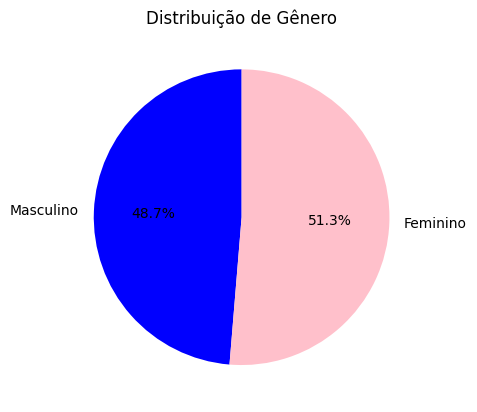

In [114]:
masculinos = df_pacientes[df_pacientes['genero'] == 'masculino']


feminino = df_pacientes[df_pacientes['genero'] == 'feminino']

print("numero de pacientes homens")
print(len(masculinos))
print ("numero de pacientes mulheres")
print(len(feminino))

#Criando o garifco

num_masculino = len(masculinos)
num_feminino = len(feminino)

labels = ['Masculino', 'Feminino']
sizes = [num_masculino, num_feminino]

plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90, colors=["blue", "pink"])
plt.title('Distribuição de Gênero')
plt.show()


faixa_etaria
0-12 anos     8194
13-17 anos    3459
18-29 anos    3663
30-49 anos    2851
50+ anos      2273
Name: count, dtype: int64


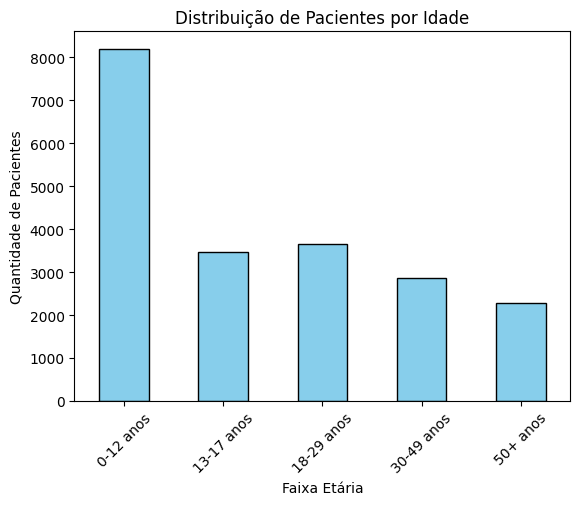

In [115]:
#Estratificação de pacientes com base na idade

bins = [0,12,18,30,50,100]

labels = ["0-12 anos", "13-17 anos", "18-29 anos", "30-49 anos", "50+ anos"]

df_pacientes["faixa_etaria"] = pd.cut(df_pacientes['idade'], bins=bins, labels=labels)

#quantos pacientes estão em cada faixa etaria

agrupando_por_idade = df_pacientes["faixa_etaria"].value_counts(). sort_index()

print(agrupando_por_idade)


agrupando_por_idade.plot(kind="bar", color="skyblue", edgecolor="black")
plt.xlabel("Faixa Etária")
plt.ylabel("Quantidade de Pacientes")
plt.title("Distribuição de Pacientes por Idade")
plt.xticks(rotation=45)
plt.show()



In [116]:
df_diagnosticos.head()

,diagnostic_global_id,patient_global_id,patient_unique_id,project,health_center,data_preench_diag,status_doenca_rara,origem_doenca,descricao_diagnostico,tp_diag,...,outro_tipo_diagnostico_etio_2,diag_etio_mol_gene,diag_etio_mol_regiao,diag_etio_mol_tipo,outro_tipo_metodo_mol,diag_etio_citogen_tipo,outro_tipo_metodo_cito,diag_etio_erros_inat_met,outro_tipo_metodo_erro_inat,obs_gerais_diagnostico
0,62405121,46621385,16143,coleta_prospectiva_2022,hospital_geral_dr,2022-11-09,diagnostico_confirmado,NaN,NaN,clinico,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,38348600,36521976,5357,coleta_prospectiva_2022,universidade_estadb,2022-06-23,diagnostico_confirmado,NaN,NaN,clinico,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,8359990,67181732,16037,coleta_prospectiva_2022,hcpa,2022-05-10,diagnostico_confirmado,NaN,NaN,etiologico,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,75041727,32477502,16948,coleta_prospectiva_2022,escola_bahiana_de,2022-11-04,diagnostico_confirmado,NaN,NaN,etiologico,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,35328497,61307935,15908,coleta_prospectiva_2022,codajassusam,2022-06-27,diagnostico_suspeito,NaN,NaN,clinico,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [117]:
print(df_diagnosticos.columns)

Index(['diagnostic_global_id', 'patient_global_id', 'patient_unique_id',
       'project', 'health_center', 'data_preench_diag', 'status_doenca_rara',
       'origem_doenca', 'descricao_diagnostico', 'tp_diag', 'ft_pag_diag',
       'momento_diag', 'dta_diag', 'idade_diagnostico',
       'idade_inicio_sintomas', 'unidade_de_tempo_idade',
       'participante_adotado', 'recorrencia_familiar', 'familiar_portador',
       'outro_portador', 'orpha_code', 'orpha_name', 'cid10_code',
       'cid10_name', 'omim_code', 'omim_name', 'outro_tipo_diagnostico',
       'tp_diag_etiologico', 'consang_relatada', 'idade_materna',
       'idade_paterna', 'origem_encaminhamento', 'outros_origem_encaminha',
       'nro_servicos_visitados', 'nro_medicos_visitados',
       'nro_nao_medicos_visitados', 'diag_etio_mol_variante_ident',
       'outro_tipo_diagnostico_etio_2', 'diag_etio_mol_gene',
       'diag_etio_mol_regiao', 'diag_etio_mol_tipo', 'outro_tipo_metodo_mol',
       'diag_etio_citogen_tipo', 'ou

,ORPHA,Quantidade
0,outros,9073
1,716.0,811
2,636.0,471
3,881.0,375
4,98896.0,366
5,442.0,320
6,586.0,269
7,803.0,256
8,91378.0,251
9,558.0,220


Text(0.5, 1.0, 'Distribuição de Diagnosticos por ORPHA')

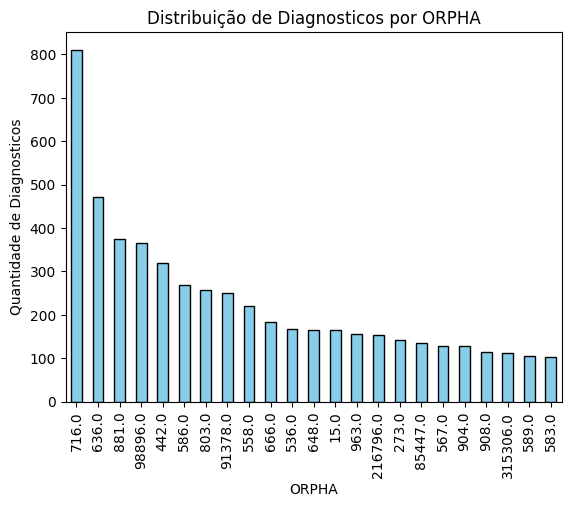

In [118]:
#pd.set_option('display.max_rows', None)
#Conta a ocorrencia de cada orpha_code
ORPHA = df_diagnosticos['orpha_code'].value_counts()
#Após a contagem, identifico os código com menos de 100 ocorrencias
orpha_code_menos_100 = ORPHA[ORPHA < 100].index
#Agora vou substituir os codigos por "outros" no dataframe original
df_diagnosticos['orpha_code'] = df_diagnosticos['orpha_code'].replace(orpha_code_menos_100, 'outros')
ORPHA_atualizado = df_diagnosticos['orpha_code'].value_counts()
# print("numero do ORPHA / numero de diagnosticos")
# print(ORPHA_atualizado)

tabela_orpha = pd.DataFrame({'ORPHA': ORPHA_atualizado.index, 'Quantidade': ORPHA_atualizado.values})
display(tabela_orpha)

#filtrando Orpha_atualizado para não exibir "outros"

ORPHA_filtrado = ORPHA_atualizado[ORPHA_atualizado.index != 'outros']


#Exibição dos resultados ORPHA_filtrado em grafico

# ORPHA_atualizado.plot(kind="bar", color="skyblue", edgecolor="black")
ORPHA_filtrado.plot(kind="bar", color="skyblue", edgecolor="black")
plt.xlabel("ORPHA")
plt.ylabel("Quantidade de Diagnosticos")
plt.title("Distribuição de Diagnosticos por ORPHA")

In [119]:
ORPHA = df_diagnosticos.groupby('orpha_code')['orpha_name'].value_counts()
print(ORPHA)

orpha_code  orpha_name                         
15.0        Acondroplasia                          160
            Nanismo acondroplástico                  5
273.0       Distrofia miotónica de Steinert         78
            Distrofia miotónica tipo 1              59
            Steinert, doença de                      5
                                                  ... 
outros      Xantoastrocitoma pleomórfico             1
            Xq25 microduplication syndrome           1
            do adulto                                1
            malformação cística linfática mista      1
            von Willebrand, doença de                1
Name: count, Length: 2095, dtype: int64


In [124]:
#Criação de um novo dashboard

# ID paciente - patient_global_id
# Idade do paciente
# Peso nascimento
# Raça/Cor
# Gênero
# Prematuridade
# Estado de residência
# Comorbidades ( Lista de CID10 das comorbidades)
# *Sinais e sintomas (Lista de HPOs) - posterior
# Escolaridade
# Idade do inicio do sintoma



df_dados = df_pacientes[['patient_global_id','idade', 'peso_nascimento',
                        'raca_cor', 'genero', 'prematuridade', 'escolaridade', 
                        'estado_residencia',]];
df_dados['HPO'] = 0

df_concatenado = df_diagnosticos_HPOS.groupby('diagnostic_global_id')['hpo_id'].apply(lambda x: ', '.join(x)).reset_index()

df_diagnosticos = df_diagnosticos.merge(df_concatenado, on='diagnostic_global_id', how='left')

df_dados = df_dados.merge(df_diagnosticos[['patient_global_id', 'hpo_id_y']], 
                          on='patient_global_id', how='left')



C:\Users\Citel\AppData\Local\Temp\ipykernel_10408\3748624993.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_dados['HPO'] = 0


In [125]:
print(df_diagnosticos.columns);
display(df_diagnosticos.head());
#display(df_dados.head(100));

Index(['diagnostic_global_id', 'patient_global_id', 'patient_unique_id',
       'project', 'health_center', 'data_preench_diag', 'status_doenca_rara',
       'origem_doenca', 'descricao_diagnostico', 'tp_diag', 'ft_pag_diag',
       'momento_diag', 'dta_diag', 'idade_diagnostico',
       'idade_inicio_sintomas', 'unidade_de_tempo_idade',
       'participante_adotado', 'recorrencia_familiar', 'familiar_portador',
       'outro_portador', 'orpha_code', 'orpha_name', 'cid10_code',
       'cid10_name', 'omim_code', 'omim_name', 'outro_tipo_diagnostico',
       'tp_diag_etiologico', 'consang_relatada', 'idade_materna',
       'idade_paterna', 'origem_encaminhamento', 'outros_origem_encaminha',
       'nro_servicos_visitados', 'nro_medicos_visitados',
       'nro_nao_medicos_visitados', 'diag_etio_mol_variante_ident',
       'outro_tipo_diagnostico_etio_2', 'diag_etio_mol_gene',
       'diag_etio_mol_regiao', 'diag_etio_mol_tipo', 'outro_tipo_metodo_mol',
       'diag_etio_citogen_tipo', 'ou

,diagnostic_global_id,patient_global_id,patient_unique_id,project,health_center,data_preench_diag,status_doenca_rara,origem_doenca,descricao_diagnostico,tp_diag,...,diag_etio_mol_tipo,outro_tipo_metodo_mol,diag_etio_citogen_tipo,outro_tipo_metodo_cito,diag_etio_erros_inat_met,outro_tipo_metodo_erro_inat,obs_gerais_diagnostico,hpo_id_x,hpo_id_y,hpo_id
0,62405121,46621385,16143,coleta_prospectiva_2022,hospital_geral_dr,2022-11-09,diagnostico_confirmado,NaN,NaN,clinico,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"HP:0000141, HP:0001596, HP:0001945, HP:0005059","HP:0000141, HP:0001596, HP:0001945, HP:0005059","HP:0000141, HP:0001596, HP:0001945, HP:0005059"
1,38348600,36521976,5357,coleta_prospectiva_2022,universidade_estadb,2022-06-23,diagnostico_confirmado,NaN,NaN,clinico,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,HP:0005855,HP:0005855,HP:0005855
2,8359990,67181732,16037,coleta_prospectiva_2022,hcpa,2022-05-10,diagnostico_confirmado,NaN,NaN,etiologico,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"HP:0000713, HP:0000718, HP:0010893","HP:0000713, HP:0000718, HP:0010893","HP:0000713, HP:0000718, HP:0010893"
3,75041727,32477502,16948,coleta_prospectiva_2022,escola_bahiana_de,2022-11-04,diagnostico_confirmado,NaN,NaN,etiologico,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"HP:0002321, HP:0002540, HP:0002650","HP:0002321, HP:0002540, HP:0002650","HP:0002321, HP:0002540, HP:0002650"
4,35328497,61307935,15908,coleta_prospectiva_2022,codajassusam,2022-06-27,diagnostico_suspeito,NaN,NaN,clinico,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"HP:0000049, HP:0000389, HP:0001249, HP:0001763...","HP:0000049, HP:0000389, HP:0001249, HP:0001763...","HP:0000049, HP:0000389, HP:0001249, HP:0001763..."


In [126]:
display(df_dados.head(100));

,patient_global_id,idade,peso_nascimento,raca_cor,genero,prematuridade,escolaridade,estado_residencia,HPO,hpo_id_y
0,47927869,54.0,NaN,preta,feminino,nao,NaN,Bahia,0,HP:0032316
1,64269877,9.0,3600.0,parda,masculino,nao,NaN,Bahia,0,"HP:0000044, HP:0001944, HP:0002013"
2,92017042,8.0,2980.0,branca,feminino,nao,NaN,Rio Grande do Sul,0,"HP:0000952, HP:0001744, HP:0001878, HP:0032106"
3,51212998,44.0,NaN,branca,feminino,nao,NaN,Rio de Janeiro,0,"HP:0000282, HP:0010741, HP:0012098, HP:0100540"
4,66083862,9.0,3735.0,preta,feminino,nao,NaN,Rio Grande do Sul,0,"HP:0000750, HP:0000952, HP:0001998, HP:0012024..."
...,...,...,...,...,...,...,...,...,...,...
95,47210264,57.0,NaN,branca,masculino,nao,NaN,São Paulo,0,"HP:0001123, HP:0030635"
96,33406902,22.0,NaN,NaN,feminino,nao,NaN,São Paulo,0,"HP:0001392, HP:0001873, HP:0001903"
97,42512669,82.0,NaN,parda,masculino,nao,NaN,Espírito Santo,0,HP:0100665
98,36878275,9.0,3320.0,branca,feminino,sim,NaN,Bahia,0,"HP:0000666, HP:0001254, HP:0001290, HP:0033155"
